# Exercise 0 : Import Libraries

In [26]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exercise 1 : Read the Dataset

In [27]:
df = pd.read_csv('heart_disease.csv')

# Exercise 2 : Drop Unnamed: 0 column

In [28]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


# Exercise 3 : EDA

1. Basic info.
2. Number of rows and columns.
3. Statistical describtion.
4. Columns names.
5. Explore the columns ca and thal using any technique.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  present   303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [30]:
df.shape

(303, 14)

In [31]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [33]:
df['ca'].isnull().sum()

0

# Exercise 4 : Handle missing data

In [34]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
present     0
dtype: int64

In [35]:
df['ca'] = df['ca'].replace('?', np.nan)
df['thal'] = df['thal'].replace('?', np.nan)


In [36]:
df['ca'].dtype

dtype('O')

In [37]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', nan], dtype=object)

# Exercise 5 : Handle Features

- Use one method between these two methods for the object type columns :-
    1. Convert data type to numeric.
    2. One hot encoding.

In [38]:
df['ca'] = pd.to_numeric(df['ca'])
df['thal'] = pd.to_numeric(df['thal'])


In [39]:
df.fillna(df.mean(), inplace=True)


In [40]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
present     0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  present   303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


# Exercise 6 : Remove Outliers (If exists)

- Use box plots for some continuous data.

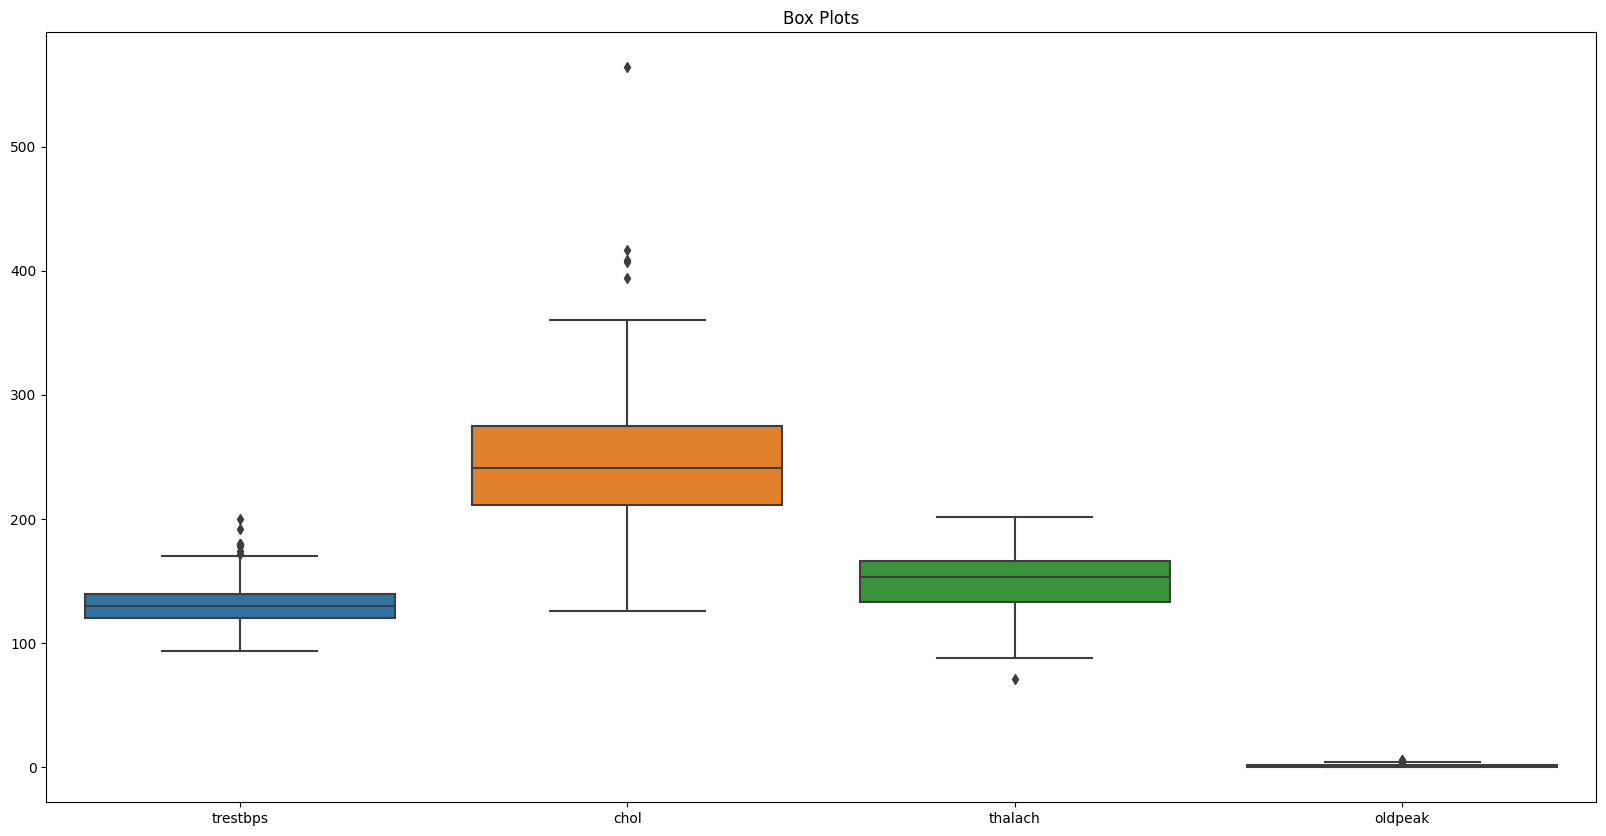

In [42]:
data = [
    df['trestbps'], df['chol'], df['thalach'],
    df['oldpeak'],
]

labels = [
    'trestbps', 'chol', 'thalach', 'oldpeak',
]

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show();

In [43]:

Q1 = np.percentile(df['trestbps'], 25)
Q3 = np.percentile(df['trestbps'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['trestbps'] >= lower_bound) & (df['trestbps'] <= upper_bound)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [44]:
Q1 = np.percentile(df['chol'], 25)
Q3 = np.percentile(df['chol'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['chol'] >= lower_bound) & (df['chol'] <= upper_bound)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [45]:
Q1 = np.percentile(df['thalach'], 25)
Q3 = np.percentile(df['thalach'], 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['thalach'] >= lower_bound) & (df['thalach'] <= upper_bound)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


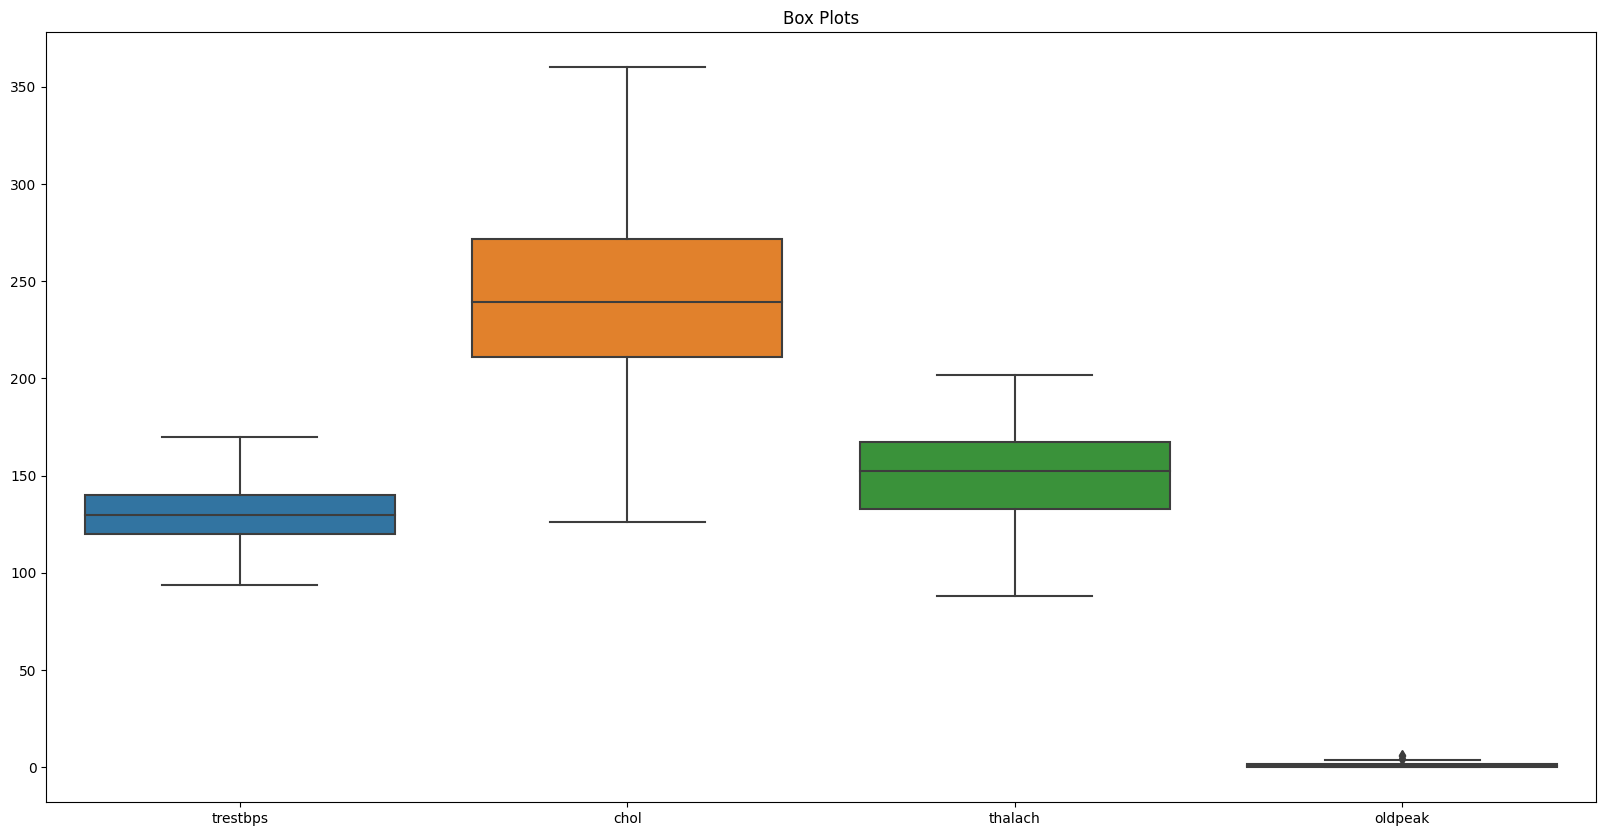

In [46]:
data = [
    df['trestbps'], df['chol'], df['thalach'],
    df['oldpeak'],
]

labels = [
    'trestbps', 'chol', 'thalach', 'oldpeak',
]

fig, ax = plt.subplots(figsize=(20, 10))

sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(labels)
ax.set_title('Box Plots')

plt.show();

In [47]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,54.104167,0.697917,3.145833,130.100694,242.628472,0.138889,0.975694,149.715278,0.319444,1.006250,1.586806,0.669059,4.699543,0.451389
std,9.072084,0.459960,0.962493,15.495765,45.024625,0.346433,0.996212,22.688057,0.467073,1.133477,0.612955,0.927488,1.925568,0.498498
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,3.000000,120.000000,210.750000,0.000000,0.000000,132.750000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,239.500000,0.000000,0.000000,152.500000,0.000000,0.600000,2.000000,0.000000,3.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,271.500000,0.000000,2.000000,167.250000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


# Exercise 7 : Feature Selection using Correlation Matrix

1. Calculate the Correlation Matrix.
2. Identify Highly Correlated Features.
    - The threshold is 0.6
3. Remove Highly Correlated Features.

In [48]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
age,1.000000,-0.070923,0.094821,0.285430,0.166409,0.104028,0.145626,-0.405847,0.086683,0.202022,0.152509,0.378122,0.126020,0.226097
sex,-0.070923,1.000000,0.052634,-0.011850,-0.113285,0.067422,0.037149,-0.051342,0.191244,0.142645,0.062437,0.124212,0.405702,0.308039
cp,0.094821,0.052634,1.000000,-0.054954,0.055928,-0.050507,0.083655,-0.332529,0.376550,0.216021,0.155647,0.229892,0.293947,0.414238
trestbps,0.285430,-0.011850,-0.054954,1.000000,0.103876,0.119409,0.154771,-0.073268,0.001799,0.157972,0.087302,0.106026,0.104487,0.128063
chol,0.166409,-0.113285,0.055928,0.103876,1.000000,0.010021,0.120515,-0.020375,0.074754,-0.018750,-0.044215,0.121122,-0.015618,0.110422
fbs,0.104028,0.067422,-0.050507,0.119409,0.010021,1.000000,0.070391,-0.018890,0.004785,-0.005768,0.057886,0.139995,0.045716,0.019055
restecg,0.145626,0.037149,0.083655,0.154771,0.120515,0.070391,1.000000,-0.104827,0.099116,0.083140,0.120442,0.118179,0.001629,0.176526
thalach,-0.405847,-0.051342,-0.332529,-0.073268,-0.020375,-0.018890,-0.104827,1.000000,-0.395158,-0.349550,-0.385314,-0.294676,-0.322447,-0.426373
exang,0.086683,0.191244,0.376550,0.001799,0.074754,0.004785,0.099116,-0.395158,1.000000,0.302253,0.255747,0.145732,0.346255,0.426081
oldpeak,0.202022,0.142645,0.216021,0.157972,-0.018750,-0.005768,0.083140,-0.349550,0.302253,1.000000,0.560904,0.289815,0.334300,0.438365


# Exercise 8 : X and Y split, then train and test split

In [49]:
X = df.drop('present', axis = 1)
Y = df['present']

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((230, 13), (58, 13), (230,), (58,))

# Exercise 9 : Train the model

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
regr = LinearRegression()

# train_x = np.asanyarray(X_train[['ENGINESIZE']])
regr.fit(X_train, Y_train)

print ('Coefficients (w) : ', regr.coef_)
print ('Intercept    (b) : ',regr.intercept_)

Coefficients (w) :  [-0.00223392  0.16576556  0.07070879  0.00185134  0.00101115 -0.02910372
  0.04819729 -0.0032558   0.0962207   0.05369977  0.0230839   0.13382643
  0.06318765]
Intercept    (b) :  -0.3123168092577707


# Exercise 10 : Evaluate the model

1. Find the score of the training data.
2. Find the scores of the testing data :-
    - Find the accuracy.
    - Find the Sensitivity.
    - Find the Specificity.
    - Find the Sensitivity/Specificity.
    - Find the AUC-ROC.

# Exercise 11 : Find the wights and y intercept

# Exercise 12 : Plot the model complexity

- Is the model overfit? Underfit? Good? Explain

# Exercise 13 : Use Regularizations

1. Build three models with Lasso Regularization and three different lambda values.
2. Build three models with Ridge Regularization and three different lambda values.
3. Build three models with Elastic-net Regularization and three different lambda values.

In general, you need to build 9 models with different Regularizations and different lambda values.

Do not forget to evaluate them (find accuracy, recall, precision, f1 score, AUC-ROC).